In [73]:
from dotenv import load_dotenv
import os
import json
from pprint import pprint, pp
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters   import RecursiveCharacterTextSplitter
from langchain_huggingface.embeddings import  HuggingFaceEmbeddings
from langchain_google_genai.embeddings import GoogleGenerativeAIEmbeddings

from langchain_community.document_loaders import PyPDFLoader,TextLoader
from typing import IO, BinaryIO
from langchain_openai import ChatOpenAI
from langchain.chains.question_answering import load_qa_chain
from langchain.chains import RetrievalQA
from uuid import uuid4
from langchain import hub
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from typing import Literal

# for Chroma 
import chromadb
from langchain_chroma import Chroma
# for FAISS
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore


In [74]:
%config IPCompleter.greedy=True

In [75]:
load_dotenv("../../../../../tokens/token_env")
#load_dotenv("langsmith_env")os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")
os.environ["GEMINI_API_KEY"] = os.getenv("GEMINI_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
#os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
#os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [76]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
llm = ChatOpenAI(model='gpt-4o', temperature=0.2)

https://python.langchain.com/docs/integrations/tools/
https://github.com/sunnysavita10/Agentic-2.0/blob/main/langgraph/tools.ipynb

In [77]:
from langgraph.graph import Graph,START,END
from IPython.display import Image,display

In [78]:
def entry_function(input: str) -> str:
    return input.upper() + " from entry functon"

In [79]:
entry_function("milind")

'MILIND from entry functon'

In [80]:
def end_function(input: str) -> str:
    return f" from middle functon received {input}"

In [81]:
end_function("MILIND from entry functon")

' from middle functon received MILIND from entry functon'

In [82]:
def conditional_function(input: str) -> Literal["rainy", "sunny"]:
    if "rainy" in input.lower():
        return "rainy"
    else:
        return "sunny"


In [83]:
def middle_function_condition1(input: str) -> str:
     return input.lower() + "_1"

In [84]:
def middle_function_condition2(input: str) -> str:
     return input.upper() + "_2"

In [85]:
workflow = Graph()

In [86]:
workflow.add_node("Start", entry_function)
workflow.add_node("End", end_function)
workflow.add_node("Condition",conditional_function)
workflow.add_node("rainy", middle_function_condition1)
workflow.add_node("sunny", middle_function_condition2)


In [87]:
workflow.add_edge(START, "Start")
workflow.add_edge("Start", "Condition")
workflow.add_conditional_edges("Condition", conditional_function)
workflow.add_edge("rainy", "End")
workflow.add_edge("sunny", "End")
workflow.add_edge("End", END)


In [88]:
#workflow.set_entry_point("Start")
#workflow.set_finish_point("End")

In [89]:
app = workflow.compile()

In [90]:
png = app.get_graph().draw_mermaid_png()

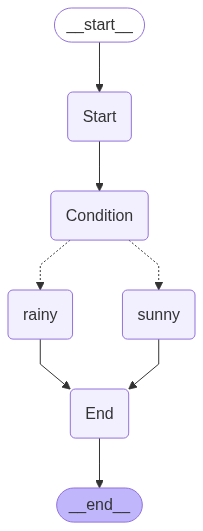

In [91]:
display(Image(png))

In [92]:
for output in app.stream("rainy"):
    for key, value in output.items():
        print(f"{key}  - {value}")
        print("--------")

Start  - RAINY from entry functon
--------
Condition  - rainy
--------
rainy  - rainy_1
--------
End  -  from middle functon received rainy_1
--------


In [93]:
for output in app.stream("sunny"):
    for key, value in output.items():
        print(f"{key}  - {value}")
        print("--------")

Start  - SUNNY from entry functon
--------
Condition  - sunny
--------
sunny  - SUNNY_2
--------
End  -  from middle functon received SUNNY_2
--------


In [94]:
def myllm(input: str) -> str:
    response= llm.invoke(input)
    return response.content

In [95]:
def count_tokens(input: str) -> int:
    return len(input.split())

In [96]:
workflow2 = Graph()

In [99]:
workflow2.add_node("Start2", myllm)
workflow2.add_node("End2", count_tokens)
workflow2.add_edge("Start2","End2")

In [100]:
workflow2.set_entry_point("Start2")
workflow2.set_finish_point("End2")

In [101]:
app2 =workflow2.compile()

In [102]:
png2 = app2.get_graph().draw_mermaid_png()

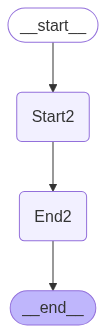

In [103]:
display(Image(png2))

In [104]:
app2.invoke("who is father of automic bomb")

60

In [117]:
app2.stream("who is father of automic bomb")

<generator object Pregel.stream at 0x112eb8740>

In [120]:
for output in app2.stream("who is father of automic bomb"):
    for k,v in output.items():
        print(k)
        print("---------")
        print(v)

Start2
---------
The father of the atomic bomb is commonly referred to as J. Robert Oppenheimer. He was the scientific director of the Manhattan Project, the World War II project that developed the first nuclear weapons.
End2
---------
34
